# Exercise 6.1: Solutions to transcendental equations - Exercise 1.2 continued!

This is a continuation of Exercise 1.2, where you were asked to graph the right- and left-hand side of the odd/even solutions to the transcendetal equations that appear in the 1-D finite square well:

The two *transcendental* equations that you were asked to graph were:

$$
\tan(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(even wave functions)}
$$

$$
-\cot(z) = \sqrt{ \frac{z_0^2}{z^2} - 1}~~~~\text{(odd wave functions)}
$$

You may use your own solution of Exercise 1.2 or the posted solution as a basis to this problem. 

Use your graph to *calculate and plot* the solutions to the above transcendetal equations for: $z_0 = 1, 8, 16$. 

You may use either the bisection method or the Newton-Raphson method to find the solutions (or both). *Do not use the builtin Python functions for this exercise!*


Solution:

We first reproduce the plots that were the solutions of Exercise 1.2:

/var/folders/1k/t4_gv3r962999ltp29cmwdt40000gq/T/ipykernel_1950/2571383873.py:20: RuntimeWarning: invalid value encountered in sqrt
  R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!


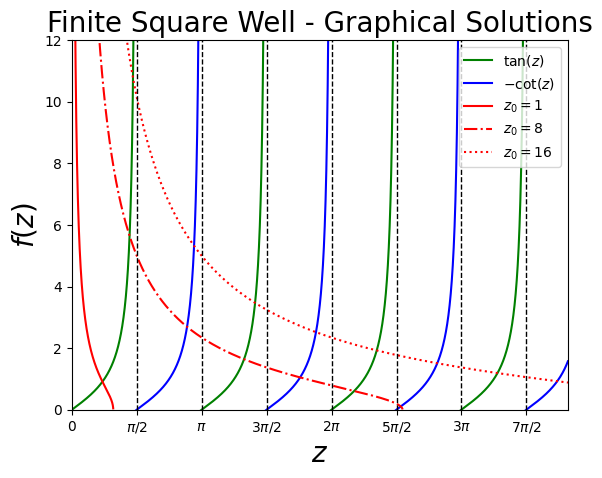

In [4]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
import math
from math import pi

# numpy array for even wave functions: i.e. tan(z), remove the points where tan(z) diverges
ze = np.linspace(0.01, 9*math.pi/2, 100000)
ze[np.abs(np.cos(ze)) <= np.abs(np.sin(ze[1]-ze[0]))] = np.nan # remove points where tan(z) diverges
# the even functions:
LE = np.tan(ze) # left-hand side of even equation

# numpy array for odd wave functions: i.e. -cot(z), remove the points where -cot(z) diverges
zo = np.linspace(0.01, 9*math.pi/2, 100000)
zo[np.abs(np.sin(zo)) <= np.abs(np.sin(zo[1]-zo[0]))] = np.nan # remove points where -cot(z) diverges
LO = -1/np.tan(zo) # left-hand side of odd equation 
    
# create a list of z_0's:
z0_list = [1, 8, 16]
z = np.linspace(0.01, 9*math.pi/2, 10000)
R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$z$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(z)$', fontsize=20) # set the y label
ax.set_title('Finite Square Well - Graphical Solutions', fontsize=20) # set the title 

# make one-dimensional plots using the above arrays
# plot tan(z) and -cot(z):
ax.plot(ze, LE, color='green', linestyle='-', label=r'$\tan(z)$') 
ax.plot(zo, LO, color='blue', linestyle='-', label=r'$-\cot(z)$') 

# plot the right-hand side of the equation for the three different values of z_0  
ax.plot(z, R[0], color='red', linestyle='-', label=r'$z_0=1$') 
ax.plot(z, R[1], color='red', linestyle='-.', label=r'$z_0=8$') 
ax.plot(z, R[2], color='red', linestyle=':', label=r'$z_0=16$') 

# plot vertical lines at pi/2, pi, 3pi/2, 2pi, 5pi/2, 3pi
ax.vlines(x=math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3*math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2.5*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3.0*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3.5*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi, 3.5*pi])
ax.set_xticklabels(['0', '$\\pi/2$', '$\\pi$', '$3\\pi/2$', '$2\\pi$', '$5\\pi/2$', '$3\\pi$', '$7\\pi/2$'])

# set the x and y limits:
ax.set_xlim(0, 12)
ax.set_ylim(0,12)

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

We can observe that for the even functions there is one solution for $z_0=1$, three solutions for $z_0=8$ and four solutions for $z_0=16$.

For the odd functions, there's no solution for $z_0=1$, three solutions for $z_0=8$ and four solutions for $z_0=16$. 

We also know where the solutions lie:

even: 
- $z_0=1$: one solution in $[0,\pi/2]$,
- $z_0=8$: one solution in $[0,\pi/2]$, one in $[\pi, 3\pi/2]$, one in $[2\pi, 5\pi/2]$.
- $z_0=16$: same as above, plus one solution in $[3\pi, 7\pi/2]$. 

odd: 
- $z_0=1$: one solution in $[\pi/2, \pi]$,
- $z_0=8$: one solution in $[\pi/2, \pi]$, one in $[3\pi/2, 2\pi]$, one in $[5\pi/2, 3\pi]$.
- $z_0=16$: same as above, plus one solution in $[7\pi/2, 4\pi]$.

Now that we know the regions, we can use the Newton-Raphson function we constructed in the lectures to find the roots and plot them. Let's first find them and put them in lists: ```xroots_even```, ```yroots_even``` and ```xroots_odd```, ```yroots_odd```, so we can later plot them easily.

Take care when setting the initial guesses! 

In [5]:
# The Newton-Raphson algorithm (Example 6.2): 
# func should be a function for which we are trying to find the solution, in the form f(x)=0
# x0 is the initial guess
# Nmax is the number of evaluations
# prec is the required precision
# dx is the distance over which to take the central-difference derivative (not the same as the step size!)
def NewtonRaphson(func, x0, Nmax, prec, dx): 
    """Function that implements the Newton-Raphson algorithm for root finding"""
    n = 0 # the number of steps taken
    val = 1E99 # the value of the equation, initialize to a large number
    root = math.nan # initialize the root to "not a number"
    while abs(val) > prec and n < Nmax: # loop terminates either when the max number of evals is reached or the precision is reached
        # get the central-difference derivative at x0:
        CD = (func(x0+dx/2) - func(x0-dx/2))/dx
        # calculate the step Dx (not the same as dx!)
        Dx = - func(x0)/CD
        # update the guess and the value of the equation:
        x0 = x0 + Dx
        val = func(x0)
        n = n + 1
    if n > Nmax-1:
        print("Warning: maximum number of evaluations exceeded:", Nmax)
    root = x0
    return root, n

In [34]:
# import partial to vary z0:
from functools import partial # partial functions allow us to fix a certain number of arguments of a function and generate a new function.

# define the even and odd functions to solve, in the form f(z) = 0:
def f_even(z,z0):
    """Returns the f(z) = 0 function for the even wave functions"""
    return np.tan(z) - np.sqrt(z0**2/np.power(z,2) - 1)

def f_odd(z,z0):
    """Returns the f(z) = 0 function for the odd wave functions"""
    return -1/np.tan(z) - np.sqrt(z0**2/np.power(z,2) - 1)

# find the solutions:
# even:
xroots_even = []
yroots_even = []
Nmax = 1000
prec = 1E-5
dx = 1E-5

# even, z0=1:
sol,iter = NewtonRaphson(partial(f_even,z0=1), math.pi/4, Nmax, prec, dx)
print('even, z0=1:', sol)
# append it to the list of solutions to plot:
xroots_even.append(sol)
yroots_even.append(math.tan(sol))

# even, z0=8:
sol1,iter = NewtonRaphson(partial(f_even,z0=8), math.pi/4, Nmax, prec, dx)
sol2,iter = NewtonRaphson(partial(f_even,z0=8),5*math.pi/4, Nmax, prec, dx)
sol3,iter = NewtonRaphson(partial(f_even,z0=8), 9*math.pi/4, Nmax, prec, dx)
print('even, z0=8, 1st:', sol1)
print('even, z0=8, 2nd:', sol2)
print('even, z0=8, 3rd:', sol3)
# append them to the list of solutions to plot:
xroots_even.append(sol1)
yroots_even.append(math.tan(sol1))
xroots_even.append(sol2)
yroots_even.append(math.tan(sol2))
xroots_even.append(sol3)
yroots_even.append(math.tan(sol3))

# even, z0=16:
sol1,iter = NewtonRaphson(partial(f_even,z0=16), math.pi/4, Nmax, prec, dx)
sol2,iter = NewtonRaphson(partial(f_even,z0=16),3*math.pi/2-0.1, Nmax, prec, dx)
sol3,iter = NewtonRaphson(partial(f_even,z0=16), 9*math.pi/4, Nmax, prec, dx)
sol4,iter = NewtonRaphson(partial(f_even,z0=16), 13*math.pi/4, Nmax, prec, dx)
print('even, z0=16, 1st:', sol1)
print('even, z0=16, 2nd:', sol2)
print('even, z0=16, 3rd:', sol3)
print('even, z0=16, 4th:', sol4)
# append them to the list of solutions to plot:
xroots_even.append(sol1)
yroots_even.append(math.tan(sol1))
xroots_even.append(sol2)
yroots_even.append(math.tan(sol2))
xroots_even.append(sol3)
yroots_even.append(math.tan(sol3))
xroots_even.append(sol4)
yroots_even.append(math.tan(sol4))

# odd:
xroots_odd = []
yroots_odd = []
# odd, z0=8:
sol1,iter = NewtonRaphson(partial(f_odd,z0=8), 3*math.pi/4, Nmax, prec, dx)
sol2,iter = NewtonRaphson(partial(f_odd,z0=8), 7*math.pi/4, Nmax, prec, dx)
sol3,iter = NewtonRaphson(partial(f_odd,z0=8), 5*math.pi/2 + 0.1, Nmax, prec, dx)
print('odd, z0=8, 1st:', sol1)
print('odd, z0=8, 2nd:', sol2)
print('odd, z0=8, 3rd:', sol3)
# append it to the list of solutions to plot:
xroots_odd.append(sol1)
yroots_odd.append(-1/math.tan(sol1))
xroots_odd.append(sol2)
yroots_odd.append(-1/math.tan(sol2))
xroots_odd.append(sol3)
yroots_odd.append(-1/math.tan(sol3))

# odd, z0=16:
sol1,iter = NewtonRaphson(partial(f_odd,z0=16), math.pi-0.1, Nmax, prec, dx)
sol2,iter = NewtonRaphson(partial(f_odd,z0=16), 7*math.pi/4, Nmax, prec, dx)
sol3,iter = NewtonRaphson(partial(f_odd,z0=16), 11*math.pi/4, Nmax, prec, dx)
sol4,iter = NewtonRaphson(partial(f_odd,z0=16), 7*math.pi/2+0.1, Nmax, prec, dx)
print('odd, z0=16, 1st:', sol1)
print('odd, z0=16, 2nd:', sol2)
print('odd, z0=16, 3rd:', sol3)
print('odd, z0=16, 4th', sol4)
# append it to the list of solutions to plot:
xroots_odd.append(sol1)
yroots_odd.append(-1/math.tan(sol1))
xroots_odd.append(sol2)
yroots_odd.append(-1/math.tan(sol2))
xroots_odd.append(sol3)
yroots_odd.append(-1/math.tan(sol3))
xroots_odd.append(sol4)
yroots_odd.append(-1/math.tan(sol4))

even, z0=1: 0.7390851423201227
even, z0=8, 1st: 1.3954661469360987
even, z0=8, 2nd: 4.164830916574928
even, z0=8, 3rd: 6.830674592643742
even, z0=16, 1st: 1.47827235173946
even, z0=16, 2nd: 4.431735727676231
even, z0=16, 3rd: 7.374934892175918
even, z0=16, 4th: 10.29647359807212
odd, z0=8, 1st: 2.7859021159228172
odd, z0=8, 2nd: 5.5214466329579865
odd, z0=8, 3rd: 7.957321497784266
odd, z0=16, 1st: 2.955788619041495
odd, z0=16, 2nd: 5.905173529665759
odd, z0=16, 3rd: 8.839457982710144
odd, z0=16, 4th 11.742331189084052


Let's now add the points to the plot. We will use *red* markers for the even solutions and *black* markers for the odd solutions. 

/var/folders/1k/t4_gv3r962999ltp29cmwdt40000gq/T/ipykernel_1950/3914334677.py:20: RuntimeWarning: invalid value encountered in sqrt
  R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!


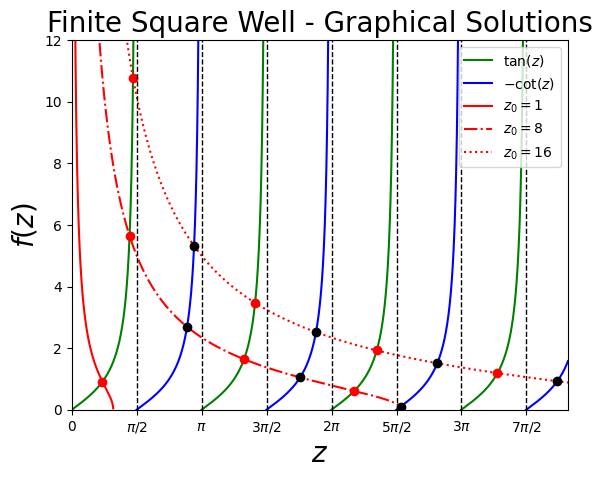

In [44]:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
import math
from math import pi

# numpy array for even wave functions: i.e. tan(z), remove the points where tan(z) diverges
ze = np.linspace(0.01, 9*math.pi/2, 100000)
ze[np.abs(np.cos(ze)) <= np.abs(np.sin(ze[1]-ze[0]))] = np.nan # remove points where tan(z) diverges
# the even functions:
LE = np.tan(ze) # left-hand side of even equation

# numpy array for odd wave functions: i.e. -cot(z), remove the points where -cot(z) diverges
zo = np.linspace(0.01, 9*math.pi/2, 100000)
zo[np.abs(np.sin(zo)) <= np.abs(np.sin(zo[1]-zo[0]))] = np.nan # remove points where -cot(z) diverges
LO = -1/np.tan(zo) # left-hand side of odd equation 
    
# create a list of z_0's:
z0_list = [1, 8, 16]
z = np.linspace(0.01, 9*math.pi/2, 10000)
R = [np.sqrt(z0**2/z**2 - 1) for z0 in z0_list] # use list comprehension to create the three different R's. Note that this will complain since the square root becomes negative at some point!

fig, ax = plt.subplots() # create the elements required for matplotlib. 

# set the labels and titles:
ax.set_xlabel(r'$z$', fontsize=20) # set the x label
ax.set_ylabel(r'$f(z)$', fontsize=20) # set the y label
ax.set_title('Finite Square Well - Graphical Solutions', fontsize=20) # set the title 

# make one-dimensional plots using the above arrays
# plot tan(z) and -cot(z):
ax.plot(ze, LE, color='green', linestyle='-', label=r'$\tan(z)$') 
ax.plot(zo, LO, color='blue', linestyle='-', label=r'$-\cot(z)$') 

# plot the right-hand side of the equation for the three different values of z_0  
ax.plot(z, R[0], color='red', linestyle='-', label=r'$z_0=1$') 
ax.plot(z, R[1], color='red', linestyle='-.', label=r'$z_0=8$') 
ax.plot(z, R[2], color='red', linestyle=':', label=r'$z_0=16$') 

# plot the solutions here:
ax.plot(xroots_even, yroots_even, marker='o', markersize=6, color='red', ls='')
ax.plot(xroots_odd, yroots_odd, marker='o', markersize=6, color='black', ls='')

# plot vertical lines at pi/2, pi, 3pi/2, 2pi, 5pi/2, 3pi
ax.vlines(x=math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3*math.pi/2, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=2.5*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3.0*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')
ax.vlines(x=3.5*math.pi, ymin=0, ymax=15, linewidth=1, ls='--', color='black')

# change the axis labels to correspond to [0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi]
ax.set_xticks([0, pi/2, pi, 1.5 * pi, 2*pi, 2.5*pi, 3*pi, 3.5*pi])
ax.set_xticklabels(['0', '$\\pi/2$', '$\\pi$', '$3\\pi/2$', '$2\\pi$', '$5\\pi/2$', '$3\\pi$', '$7\\pi/2$'])

# set the x and y limits:
ax.set_xlim(0, 12)
ax.set_ylim(0,12)

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here